In [35]:
data_path = '/home/yigit/projects/is/data/'
folder_path = f'{data_path}data_raw/'

time_steps = 400

In [44]:
import numpy as np
import matplotlib.pyplot as plt


def process_file(file_path):
    states = np.load(file_path)
    ego_states = np.zeros_like(states)
    
    # final pose of the traj is the goal
    start_pose, goal_pose = states[0, :2], states[-1, :2]
    for i, state in enumerate(states):
        ego_states[i, :2] = goal_pose - state[:2]
        ego_states[i, 2:] = state[2:]
#     ego_states[i, -2:] = [0, 0]  # last vel is 0
    return start_pose, goal_pose, ego_states


def interpolate(states):
    t_orig, d = states.shape
    
    t = np.linspace(0, 1, time_steps)
    tp = np.linspace(0, 1, t_orig)
    
    cont_states = np.zeros((time_steps, d))
    
    for i in range(d):
        cont_states[:, i] = np.interp(t, tp, states[:, i])
        
    return cont_states


def plot_trajectories(trajectories):
    for i in range(trajectories.shape[0]):
        plt.plot(trajectories[i, :, 0], trajectories[i, :, 1])
        
    plt.show()

[[-4.23737559e+00  1.13545615e+01  2.21784954e+01  4.84706783e+00
   1.97143004e+00  1.31415410e-02]
 [-4.22592918e+00  1.13285069e+01  2.21940081e+01  4.86233725e+00
   1.97287531e+00  1.12035450e-02]
 [-4.21448277e+00  1.13024524e+01  2.22095209e+01  4.87760666e+00
   1.97432059e+00  9.26554907e-03]
 ...
 [-2.18645273e-02  5.18446993e-02  7.80605364e+00 -2.47492102e+00
   1.97998440e+00 -6.97472024e-03]
 [-1.09322637e-02  2.59223496e-02  7.74898243e+00 -2.55127253e+00
   1.97983617e+00 -7.09615221e-03]
 [ 0.00000000e+00  0.00000000e+00  7.69191122e+00 -2.62762403e+00
   1.97968795e+00 -7.21758419e-03]]


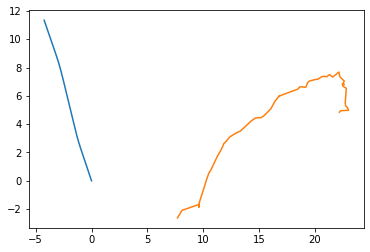

In [46]:
import os


trajectories = []
for filename in os.listdir(folder_path):
    f = os.path.join(folder_path, filename)
    
    # checking if it is a file
    if os.path.isfile(f) and f.endswith('npy'):
        start, goal, ego_states = process_file(f)
        cont_states = interpolate(ego_states)
        
        np.save(f"{data_path}/processed_states/{filename.strip('_states.npy')}.npy", cont_states)
        trajectories.append(cont_states)

trajectories = np.array(trajectories)
plot_trajectories(trajectories)